# Predicting Red Wine Quality
## Phase 1: Data Preparation & Visualisation

### Group Name: Group 21

### Names(s) & ID(s) of Group Members: Michael Xie (s3943224), Samuel Lausberg (s3948914)

## Table of Contents
<ul>
    <li>
    <a href='#introduction'>Introduction</a>
    </li>
    <ul>
        <li>
        <a href='#data_source'>Dataset Source</a>
        </li>
        <li>
        <a href='#data_details'>Dataset Details</a>
        </li>
        <li>
        <a href='#data_features'>Dataset Features</a>
        </li>
        <li>
        <a href='#target_features'>Target Features</a>
        </li>
    </ul>
    </li>
    <li>
    <a href='#goals'>Goals and Objectives</a>
    </li>
    <li>
    <a href='#data_cleaning'>Data Cleaning</a>
    </li>
    <li>
    <a href='#data_exploration'>Data Exploration and Visualisation</a>
    </li>
    <li>
    <a href='#summary'>Summary and Conclusions</a>
    </li>
    <li>
    <a href='#references'>References</a>
    </li>
</ul>

## <u>Introduction</u><a id='introduction'></a>


### Dataset Source <a id='data_source'></a>
The Red Wine Quality dataset used in the study was sourced from UCI Machine Learning Repository (P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis., 2009). The dataset contains 2009 red wine qualities scored between 0 and 10.

### Dataset Details  <a id='data_details'></a>


The dataset contains information about characteristisc of red wine, with data on the features fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality. Quality is the characteristic that we will be creating a predictive model on using multi-linear regression on the other red wine characteristics.

This dataset has a total of 12 features (including quality) and 1599 obversations. The dataset has already been cleaned and preprocessed for us, mentioned again below.

In [8]:
# libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [36]:
# read csv
file_name = "Phase1_Group21.csv"
wine_df = pd.read_csv(file_name, sep=';')

In [152]:
# see a sample
wine_df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
916,5.3,0.715,0.19,1.5,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,5
544,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
1404,8.0,0.500,0.39,2.6,0.082,12.0,46.0,0.99850,3.43,0.62,10.7,6
1265,7.2,0.570,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6
613,8.2,0.390,0.38,1.5,0.058,10.0,29.0,0.99620,3.26,0.74,9.8,5
1039,8.9,0.500,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,6
1023,8.2,0.320,0.42,2.3,0.098,3.0,9.0,0.99506,3.27,0.55,12.3,6
1261,6.3,1.020,0.00,2.0,0.083,17.0,24.0,0.99437,3.59,0.55,11.2,4
618,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5


### Dataset Features  <a id='data_features'></a>

The features of the red wine dataset are described in the following table.
The units are taken from the research paper, "Modeling wine preferences by data mining from physicochemical properties" (P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis., 2009).
The descriptions were taken from the Kaggle data source.

In [5]:
from tabulate import tabulate

col_desc = [
    ['Name', 'Data Type', 'Units', 'Description'],
    ['Fixed acidity', 'Numeric', 'g(tartaric acid)/dm^3', 'Most acids involved with wine or fixed or\nnonvolatile (do not evaporate readily)'],
    ['Volatile acidity', 'Numeric', 'g(acetic acid)/dm^3', 'The amount of acetic acid in wine,\nwhich at too high of levels can lead to\nan unpleasant, vinegar taste'],
    ['Citric acid', 'Numeric', 'g/dm^3', "Found in small quantities, citric acid can\nadd 'freshness' and flavor to wines"],
    ['Residual sugar', 'Numeric', 'g/dm^3', "the amount of sugar remaining after\nfermentation stops, it's rare to find\nwines with less than 1 gram/liter and\nwines with greater than 45 grams/liter\nare considered sweet"],
    ['Chlorides', 'Numeric', 'g(sodium chlorid)/dm^3', 'The amount of salt in the wine'],
    ['Free sulfur dioxide', 'Numeric', 'mg/dm^3', 'The free form of SO2 exists in equilibrium\nbetween molecular SO2 (as a dissolved gas)\nand bisulfite ion; it prevents microbial growth\nand the oxidation of wine'],
    ['Total sulfur dioxide', 'Numeric', 'mg/dm^3', 'Amount of free and bound forms of S02;\nin low concentrations, SO2 is mostly undetectable\nin wine, but at free SO2 concentrations\nover 50 ppm, SO2 becomes evident\nin the nose and taste of wine'],
    ['Density', 'Numeric', 'g/cm^3', 'The density of water is close to that of water\ndepending on the percent alcohol and sugar content'],
    ['pH', 'Numeric', 'pH', 'Describes how acidic or basic a wine is\non a scale from 0 (very acidic)\nto 14 (very basic); most wines\nare between 3-4 on the pH scale'],
    ['Sulphates', 'Numeric', 'g(potassium suphate)/dm^3', 'A wine additive which can contribute\nto sulfur dioxide gas (S02) levels,\nwich acts as an antimicrobial and antioxidant'],
    ['Alcohol', 'Numeric', 'vol%', 'The percent alcohol content of the wine'],
    ['Quality', 'Ordinal categorical', 'N/A', 'Score between 0 and 10']
]

print(tabulate(col_desc, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════════╤═════════════════════╤═══════════════════════════╤════════════════════════════════════════════════════╕
│ Name                 │ Data Type           │ Units                     │ Description                                        │
╞══════════════════════╪═════════════════════╪═══════════════════════════╪════════════════════════════════════════════════════╡
│ Fixed acidity        │ Numeric             │ g(tartaric acid)/dm^3     │ Most acids involved with wine or fixed or          │
│                      │                     │                           │ nonvolatile (do not evaporate readily)             │
├──────────────────────┼─────────────────────┼───────────────────────────┼────────────────────────────────────────────────────┤
│ Volatile acidity     │ Numeric             │ g(acetic acid)/dm^3       │ The amount of acetic acid in wine,                 │
│                      │                     │                           │ which at too high of levels c

### Target Feature  <a id='target_features'></a>

The target feature for this project will be the red wines' quality score from 0 to 10. This value will be predicted with the 11 explanatory variables using a linear regression model.

## <u>Goals and Objectives</u> <a id='goals'></a>

Red wine is an alcoholic beverage which is enjoyed by many around the world and therefore is an industry worth 182 billion dollars in 2020 which is predicted to reach 278.5 billion dollars by 2028 (Samriddhi Chauhana and Roshan Deshmukh "Wine Red Market").

As this is such a lucrative business, a model that can confidently predict a red wine's quality will be of great importance to red wine companies looking to increase sales. Optimising a red wine's quality with an accurate model, will increase the amount of satisfied consumers investing in the product, thus allowing red wine companies to achieve higher sales. Furthermore, this model could be beneficial to critical investors who wish to identify certain factors which generally enhance the enjoyment of red wine. 

The objective of this project is to be able to use a linear regression model to accurately predict a red wine's quality when only its features are known. Additionally, we want to be able to recognize the specific features that have the most weight on a red wine's quality. 

The linear regression model will be working under the assumption that there is a linear relaion between all of the red wine's features and its quality and that no two oberservations are correlated to each other.

## <u>Data Cleaning and Preprocessing</u> <a id='data_cleaning'></a>

### Data Cleaning Steps

As can be seen below, there are no null values for any of the columns present in the dataset. The dataset available online has already been cleaned and preprocessed before it was made available to the public. As such, there is no cleaning or preprocessing needed.

It should be noted that there are 0 values for citric acid. However this is believed to be accurate, as these are few in number, and there are other very small values going as low as 0.02. This leads us to believe that this is simply natural variation in the levels of citric acid in the wines. 

In [6]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Random Sampling

The dataset contains 1599 rows of data as can be seen below. Due to the fact that the data set is not overly large, we do not have any need to use random sampling in our data analysis to cut down on the amount of data.

In [7]:
len(wine_df)

1599

## <u>Data Exploration and Visualisation</u> <a id='data_exploration'></a>

### Univariate Visualisation

#### Histogram of Citric Acid

Citric acid is used in small amounts to add freshness and flavour to wines, and therefore is suspected to contribute to the quality of red wine.

To gain an insight on what is the most commonly added range of citric acid for all observations, we graphed a histogram with eight bins. Few bins are shown to reduce the amount of noise and to increase the readability of the graph. 

From the graph we can see that the most common range is 0-0.125 g/dm^3. We can also see a trend where increasing the amount of citric acid added, results in decreasing red wine observations.

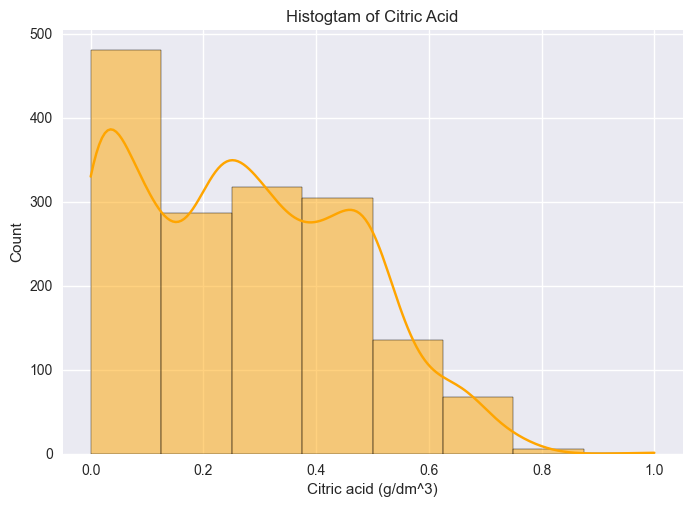

In [119]:
citric_plt = sns.histplot(wine_df['citric acid'], color='orange', bins=8, kde=True)
citric_plt.set(title='Histogram of Citric Acid')
citric_plt.set(xlabel='Citric acid (g/dm^3)')
plt.show()

### Two-Variable Visualisation

#### Line graph of Quality and Volatile Acidity

Volatile acidity is the amount of acetic acid in wine. High amounts can lead to an unpleasant vinegar taste.

To check if quality is indeed affected by volatile acidity, a line graph was produced.

From the line graph, it can generally be seen that as the volatile acidity increases, the quality will in return decrease. Thus there is a correlation between volatile acidity and quality.

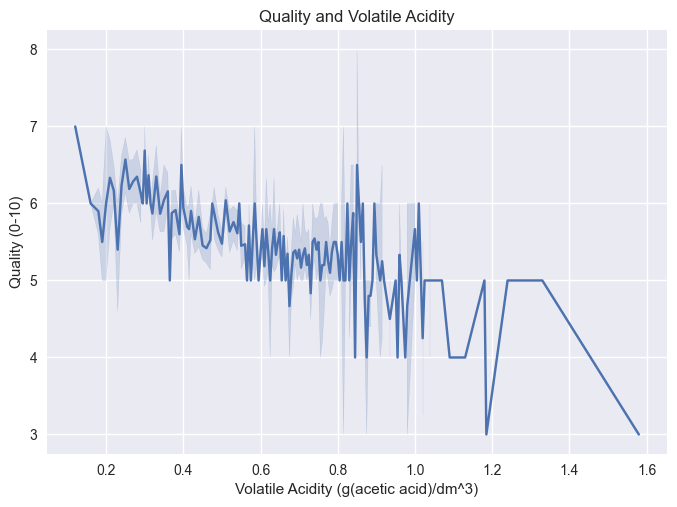

In [150]:
quality_vacid_plot=sns.lineplot(x=wine_df['volatile acidity'], y=wine_df['quality'])
quality_vacid_plot.set(title='Quality and Volatile Acidity')
quality_vacid_plot.set(ylabel='Quality (0-10)')
quality_vacid_plot.set(xlabel='Volatile Acidity (g(acetic acid)/dm^3)')
plt.show()

### Three-Variable Visualisation

#### Height map opf Quality from Citric Acid and Alcohol

The following height map shows how both citric acid and alcohol will affect the quality of the red wine. 

There is no obvious correlation between the two independent variable and the dependent variable, as the dark spots (higher qualties) are scattered unpredictably around the height map.

Otherwise, it should be noted that there is a large concentration of high quality scores around the spot where citric acid is 0.2 g/dm^3 and alcohol is 14%.

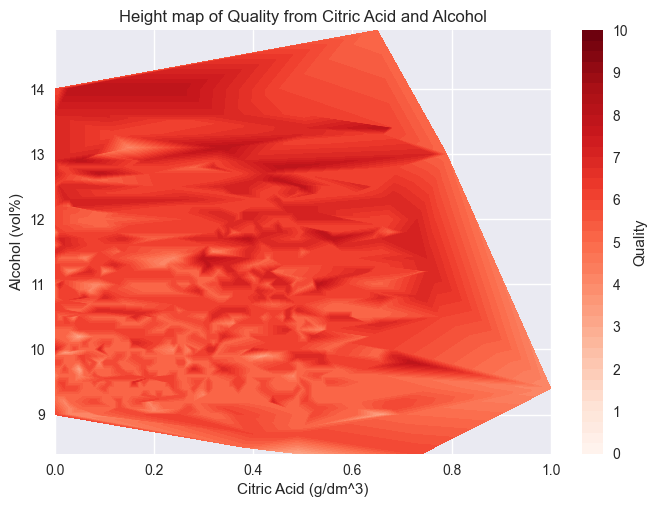

In [216]:
levels = np.arange(0, 10.25, 0.25)
plt.tricontourf(wine_df['citric acid'], wine_df['alcohol'], wine_df['quality'], levels=levels, cmap='Reds')
plt.title('Height map of Quality from Citric Acid and Alcohol')
plt.xlabel('Citric Acid (g/dm^3)')
plt.ylabel('Alcohol (vol%)')
plt.colorbar(label='Quality', ticks=np.arange(0,11))
plt.show()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.100000,4
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1118,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.300000,6
1126,5.8,0.29,0.26,1.7,0.063,3.0,11.0,0.99150,3.39,0.54,13.500000,6
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6


## <u>Summary and Conclusions</u> <a id='summary'></a>

## References
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. "Wine Quality Data Set" (Kaggle). Retrieved September 27, 2022 from https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. "Modeling wine preferences by data mining from physicochemical properties" (ScienceDirect). Retrieved September 27, 2022 from https://www.sciencedirect.com/science/article/pii/S0167923609001377?fr=RR-1&ref=cra_js_challenge
- Samriddhi Chauhana and Roshan Deshmukh "Wine Red Market" (Allied Research Market). Retrieved September 28, 2022 from https://www.alliedmarketresearch.com/red-wine-market-A13400